# The task is to build a model to predict the category of an animal: dog or cat?

In [2]:
# 4 steps are required to build a CNN: 
#1.Convolution, 
#2.Max pooling, 
#3.Flattening, and 
#4.Full connection


# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

In [3]:
classifier = Sequential()
# Convolution is a linear operation involving the multiplication of weights with the input.
# The multiplication is performed between an array of input data and a 2D array of weights known as filter or kernel. 
# It is represented like ana array of 0 and 1
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

#The pooling operation provides spatial variance making the system capable of recognizing an object with some varied appearance.
# pooling basically helps reduce the number of parameters and computations present in the network. 
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#The output from the final Pooling layer which is flattened is the input of the fully connected layer.
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [4]:
# Compile the CNN by choosing an SGD algorithm, a loss function, and performance metrics. 
# We use binary_crossentropy for binary classification, and use categorical_crossentropy for multiple classification problem.

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
# Image augmentation is a method of applying different kinds of transformation to original images resulting in multiple transformed copies of the same image. 
# The images are different from each other in certain aspects because of shifting, rotating, flipping techniques. 
# So, we are using the Keras ImageDataGenerator class to augment our images.
#create an object of ImageDataGenerator, for augmenting train set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


##create another object of ImageDataGenerator, for augmenting test set
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
# we will use flow_from_directory(directory) method from Keras Official website to load images and apply augmentation. 
# This is why we structured the data folders in a specific way so that the class of each image can be identified from its folder name.

In [6]:
#apply image augmentation on train set by resizing all images to 64x64 and creating batches of 32 images.
training_set = train_datagen.flow_from_directory(r'C:\Users\M.komala\OneDrive\Desktop\keras\dog vs cat\dataset\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 30,
                                                 class_mode = 'binary')


Found 8000 images belonging to 2 classes.


In [7]:
#apply image augmentation on test set by resizing all images to 64x64 and creating batches of 32 images.
test_set = test_datagen.flow_from_directory(r'C:\Users\M.komala\OneDrive\Desktop\keras\dog vs cat\dataset\test_set',
                                            target_size = (64, 64),
                                            batch_size = 30,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [12]:

classifier.fit_generator(training_set,
                         steps_per_epoch = (8000/32),
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = (2000/32))

C:\Users\M.komala\AppData\Local\Temp\ipykernel_9924\3171078237.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/25
250/250 [==============================] - 626s 2s/step - loss: 0.6608 - accuracy: 0.6036 - val_loss: 0.7445 - val_accuracy: 0.5519
Epoch 2/25
250/250 [==============================] - 338s 1s/step - loss: 0.5988 - accuracy: 0.6781 - val_loss: 0.5671 - val_accuracy: 0.7159
Epoch 3/25
250/250 [==============================] - 227s 910ms/step - loss: 0.5724 - accuracy: 0.7012 - val_loss: 0.5456 - val_accuracy: 0.7376
Epoch 4/25
250/250 [==============================] - 170s 678ms/step - loss: 0.5490 - accuracy: 0.7156 - val_loss: 0.5535 - val_accuracy: 0.7302
Epoch 5/25
250/250 [==============================] - 55s 220ms/step - loss: 0.5453 - accuracy: 0.7187 - val_loss: 0.5311 - val_accuracy: 0.7519
Epoch 6/25
250/250 [==============================] - 43s 173ms/step - loss: 0.5317 - accuracy: 0.7311 - val_loss: 0.5499 - val_accuracy: 0.7265
Epoch 7/25
250/250 [==============================] - 44s 174ms/step - loss: 0.5282 - accuracy: 0.7323 - val_loss: 0.5257 - val_accu

In [13]:
import numpy as np

In [ ]:
# Predict the image 1

In [19]:
from keras.preprocessing import image

In [25]:
import tensorflow as tf

In [28]:
import keras

In [55]:
test_image =  keras.utils.load_img(r'C:\Users\M.komala\OneDrive\Desktop\keras\CNN\data\test\test set\111 (1).jpg', 
                            target_size = (64, 64))

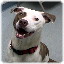

In [56]:
test_image

In [40]:
from keras.utils import np_utils

In [57]:
#add channel dimension for image
test_image = tf.keras.utils.img_to_array(test_image)

In [59]:
##add batch dimension for image
test_image = np.expand_dims(test_image, axis = 0)

In [60]:
result = classifier.predict(test_image)

1/1 [==============================] - 0s 203ms/step


In [61]:
result

array([[1.]], dtype=float32)

In [64]:
if result [0][0] ==0:
    print('It is a Cat Image')
else:
    print('It is a Dog Image')

It is a Dog Image


In [63]:
training_set.class_indices

# when the output is '0' it is cat
# when the output is '1' it is Dog

{'cats': 0, 'dogs': 1}

In [ ]:
# Predict 2nd Image

In [71]:
test_image1 =  keras.utils.load_img(r'C:\Users\M.komala\OneDrive\Desktop\keras\CNN\data\train\train set\9.jpg',
                                    target_size = (64, 64))

test_image1 = tf.keras.utils.img_to_array(test_image1)

In [74]:
##add batch dimension for image
test_image1 = np.expand_dims(test_image1, axis = 0)

In [76]:
result = classifier.predict(test_image1)

1/1 [==============================] - 0s 219ms/step


In [77]:
result

array([[0.]], dtype=float32)

In [78]:
if result [0][0] ==0:
    print('It is a Cat Image')
else:
    print('It is a Dog Image')

It is a Cat Image
